In [1]:
import numpy as np 
import networkx as nx 
import os 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
micro_lattice = nx.read_edgelist("OR_micro_lattice.edgelist")
macro_lattice = nx.read_edgelist("OR_macro_lattice.edgelist")

micro_pid = np.load("OR_micro_PID_dicts.npz", allow_pickle=True)
micro_lattice_nums = micro_pid["arr_0"][0]
micro_lattice_terms = micro_pid["arr_0"][1]

macro_pid = np.load("OR_macro_PID_dicts.npz", allow_pickle=True)
macro_lattice_nums = macro_pid["arr_0"][0]
macro_lattice_terms = macro_pid["arr_0"][1]

In [15]:
micro_paths = dict(nx.shortest_paths.single_source_dijkstra_path_length(micro_lattice, "{0:1:2:3:4}"))
macro_paths = dict(nx.shortest_paths.single_source_dijkstra_path_length(macro_lattice, "{0:1:2}"))

In [16]:
total_micro = max([x[0] for x in micro_lattice_terms.values()])
total_macro = max([x[0] for x in macro_lattice_terms.values()])

for node in micro_lattice.nodes:
    micro_lattice.nodes[node]["pi_term"] = micro_lattice_terms[node][1] / total_micro
    micro_lattice.nodes[node]["level"] = micro_paths[node]
    
for node in macro_lattice.nodes:
    macro_lattice.nodes[node]["pi_term"] = macro_lattice_terms[node][1] / total_macro
    macro_lattice.nodes[node]["level"] = macro_paths[node]

In [17]:
print("Micro Total", total_micro, "bit")
print("Macro Total", total_macro, "bit")

Micro Total 2.8113 bit
Macro Total 0.8113 bit


/home/thosvarley/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


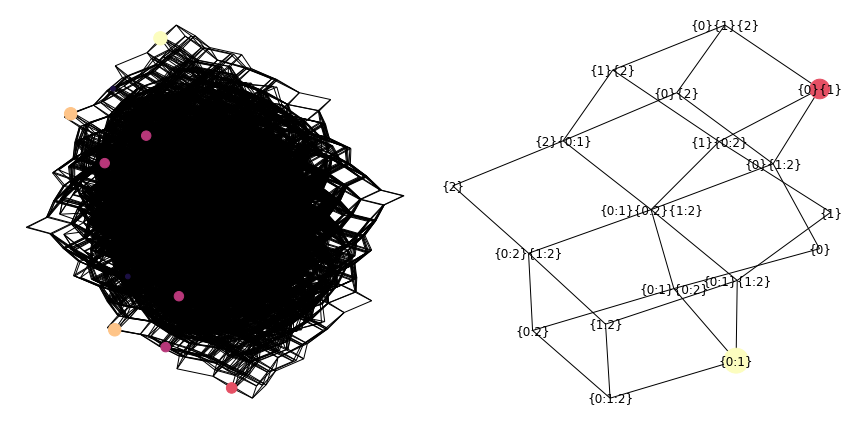

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
micro_size = [1000*x for x in nx.get_node_attributes(micro_lattice, "pi_term").values()]
nx.draw_kamada_kawai(micro_lattice,
                     node_color=list(nx.get_node_attributes(micro_lattice, "pi_term").values()),
                     node_size=micro_size,
                     cmap="magma")

plt.subplot(1,2,2)
macro_size = [1000*x for x in nx.get_node_attributes(macro_lattice, "pi_term").values()]
nx.draw_kamada_kawai(macro_lattice,
                     node_color=list(nx.get_node_attributes(macro_lattice, "pi_term").values()),
                     node_size=macro_size,
                     cmap="magma",
                     with_labels=True)
plt.tight_layout()

In [26]:
micro_synergy = sum([micro_lattice.nodes[node]["pi_term"] for node in micro_lattice if micro_lattice.nodes[node]["level"] < 15])
micro_redundancy = sum([micro_lattice.nodes[node]["pi_term"] for node in micro_lattice if micro_lattice.nodes[node]["level"] >= 15])

In [19]:
print("Above The Middle (Micro):", 100*micro_synergy / (micro_synergy+micro_redundancy), "%")
print("Below the Middle (Micro):", 100*micro_redundancy / (micro_synergy+micro_redundancy), "%")

Above The Middle (Micro): 19.96585209689468 %
Below the Middle (Micro): 80.03414790310532 %


In [27]:
macro_synergy = sum([macro_lattice.nodes[node]["pi_term"] for node in macro_lattice if macro_lattice.nodes[node]["level"] < 3])
macro_redundancy = sum([macro_lattice.nodes[node]["pi_term"] for node in macro_lattice if macro_lattice.nodes[node]["level"] >= 3])

In [21]:
print("Above The Middle (Macro):", 100*macro_synergy / (macro_synergy+macro_redundancy), "%")
print("Below the Middle (Macro):", 100*macro_redundancy / (macro_synergy+macro_redundancy), "%")

Above The Middle (Macro): 61.629483544927886 %
Below the Middle (Macro): 38.37051645507211 %
